Take grayscale image of size 512x512 and perform the following operations – 
Perform the brightness enhancement of a specific range of gray levels and observe its result
Differentiate the results of power law transform and inverse logarithmic transform
Find the difference image between original and the image obtained by last three bits (MSB)  


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


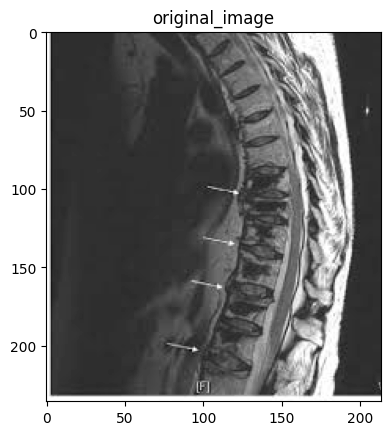

In [4]:
original_image = cv2.imread("4th.jpeg",cv2.IMREAD_GRAYSCALE)
plt.imshow(original_image,cmap='gray')
plt.title("original_image")
plt.show()

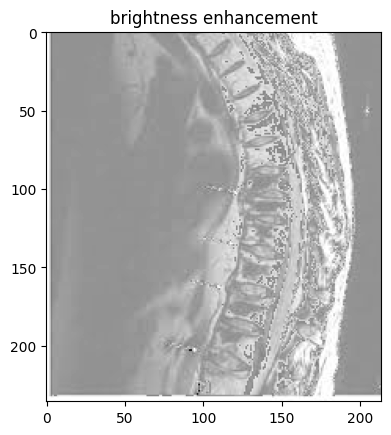

In [5]:
strat_point,end_point,extra=10,130,100
height,width = original_image.shape
image = original_image.copy()
for r in range(height):
    for c in range(width):
        if(image[r,c]>=10 and image[r,c]<=130):
            image[r,c]+=extra
        image[r,c]=255 if(image[r,c]>255) else image[r,c]
plt.imshow(image,cmap='gray')
plt.title("brightness enhancement")
plt.show()

In [ ]:
def transormed_power(dimage,gamma):
    transformed_image = dimage.copy()
    height,width = dimage.shape
    for r in range(height):
        for c in range(width):
            pixel = float(dimage[r,c])/255.0
            transformed_image[r,c]=(pixel**gamma)*255
    return np.uint8(transformed_image)

In [7]:
def inverse(dimage):
    c = 255/np.log(256)
    transformed_image = np.exp(dimage/c)-1
    return np.uint8(transformed_image)


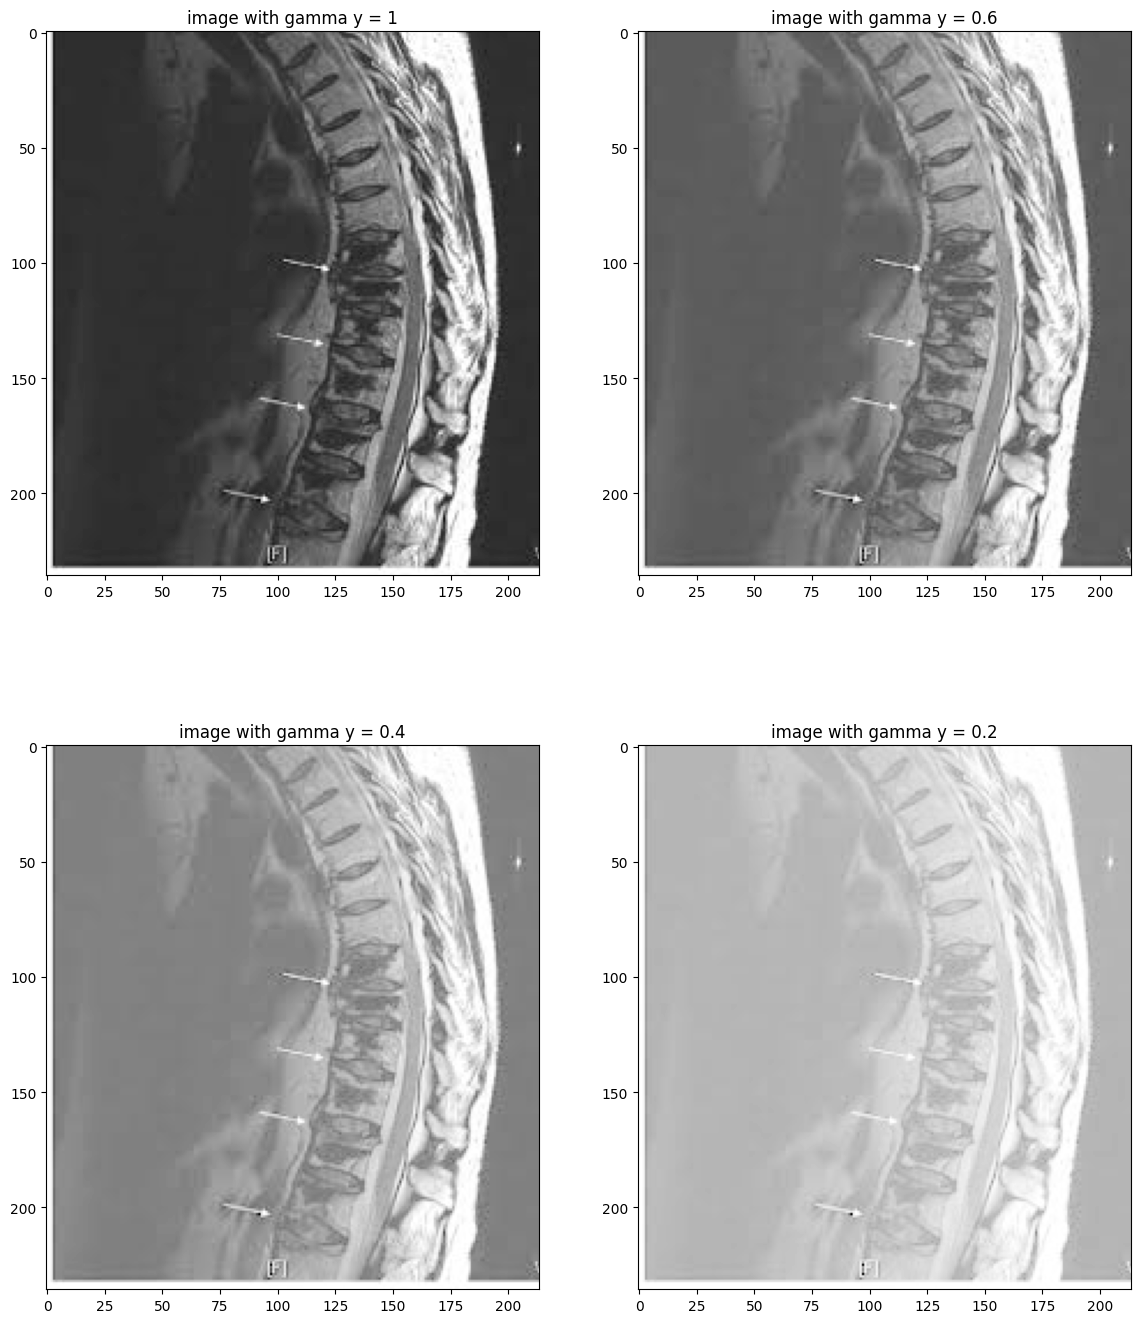

In [8]:
spine_image = cv2.imread("4th.jpeg",cv2.IMREAD_GRAYSCALE)
gammas, subplot_number=[1,0.6,0.4,0.2],1
plt.figure(figsize=(14,17))
for gamma in (gammas):
    tranformed_image = transormed_power(spine_image,gamma)
    plt.subplot(2,2,subplot_number)
    plt.imshow(tranformed_image, cmap='gray')
    plt.title(f"image with gamma y = {gamma}")
    subplot_number +=1
plt.show()
    

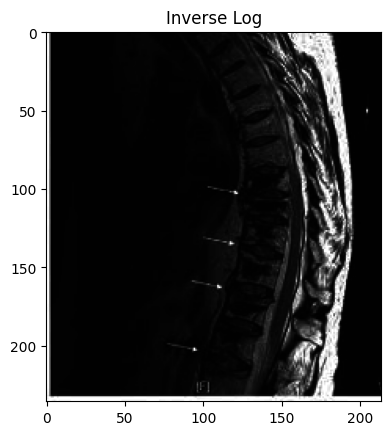

In [10]:
tranformed_image = inverse(spine_image)
plt.imshow(tranformed_image,cmap='gray')
plt.title("Inverse Log")
plt.show()

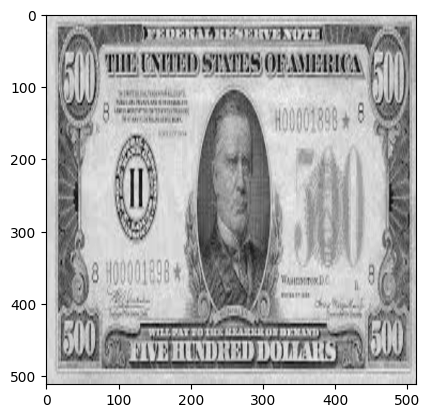

In [11]:
dollar_image =cv2.imread("5th.jpeg",cv2.IMREAD_GRAYSCALE)
dollar_image = cv2.resize(dollar_image,(512,512))
plt.imshow(dollar_image, cmap='gray')
plt.show()

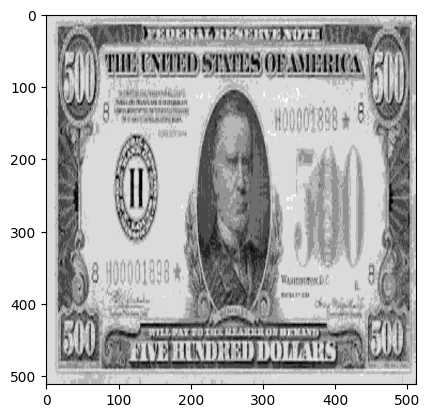

In [13]:
mask = "11100000"
bit_mask = dollar_image & int(mask,2)
plt.imshow(bit_mask,cmap='gray')
plt.show()

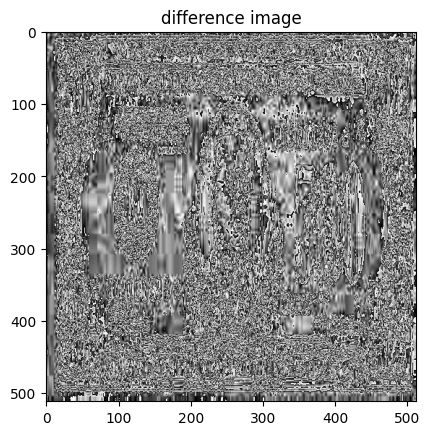

In [14]:
difference_image = cv2.absdiff(np.array(dollar_image),np.array(bit_mask))
plt.imshow(difference_image,cmap='gray')
plt.title("difference image")
plt.show()